# Question 4
### How does the prevalence of inadequate sleep vary across different demographic groups, such as sex, education, mental health and socioeconomic status, among the adult population in the US?

---

+ We will begin by doing a simple EDA to visualise difference in distributions for each of the demographic groups defined. 
+ We'll see if there's statistical evidence stating that there is inadequate sleep difference in these categories through an ANOVA t-student test.

### Index 
* [**Data Processing**](#section1)
* [**EDA**](#section2)
  * [Descriptive Statistics for Sleep Time](#eda-section1)
  * [Descriptive Statistics for Comparable Factors](#eda-section2)
  * [Descriptive Statistics through comparison](#eda-section3)
* [**ANOVA and Confidence Interval Analysis**](#section3)
  * [ANOVA](#an-section1)
  * [Confidence Interval](#an-section2)


#### **Libraries** <a id='section1'></a>

In [43]:
from IPython.display import display

from plotly.subplots import make_subplots
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import scipy.stats as stats
import plotly.express as px
import numpy as np
import pandas as pd
from scipy.stats import chi2_contingency
import pandas as pd
import scipy.stats as stats

In [3]:
data = pd.read_csv('final_sample.csv')

We have defined the following lists of variables: 
+ Relevant Vars indicate the variables most associated with our question 
+ Additional Vars will help us dive deeper in case we see that the degree of inadequate sleep does not vary over our core factors. 
+ For a more extensive exploration, we have selected the variables relating to health as we could find out that some health conditions could affect sleeping patterns. 

In [4]:
relevant_vars = ['sleptim1', 'sex', 'income2', 'educa', 'employ1', 'menthlth']
additional_vars = ['marital', 'children', 'internet']
health_vars = ['medcost', 'htlhpln1', 'bphigh4', 'diabete3', 'asthma3', 'diff_walk']

## **EDA** <a id='section2'></a>

1. [Descriptive Statistics for Sleep Time](#eda-section1)
2. [Descriptive Statistics for Comparable Factors](#eda-section2)
3. [Descriptive Statistics through comparison](#eda-section3)

<a id='eda-section1'></a>
### Descriptive Statistics for Sleep Time

In [5]:
data['sleptim1'] = data['sleptim1'].round()
data['menthlth'] = data['menthlth'].round()
sleep_time_summary = data['sleptim1'].value_counts(normalize=True)*100
formatted_sleep_percentage = sleep_time_summary.map('{:.2f}%'.format)
sleep_time_stats = data['sleptim1'].describe()

print(f"Sleep Time Distribution and Statistics:\nSleep Time Sample Distribution:\n{'='*10}\n{formatted_sleep_percentage}\n\nSleep Time Stats:\n{'='*10}\n{sleep_time_stats}")

Sleep Time Distribution and Statistics:
Sleep Time Sample Distribution:
sleptim1
7.0     32.16%
8.0     27.87%
6.0     22.56%
5.0      6.95%
9.0      4.36%
4.0      2.85%
10.0     2.36%
3.0      0.74%
11.0     0.14%
Name: proportion, dtype: object

Sleep Time Stats:
count    18000.000000
mean         6.962611
std          1.251652
min          3.000000
25%          6.000000
50%          7.000000
75%          8.000000
max         11.000000
Name: sleptim1, dtype: float64


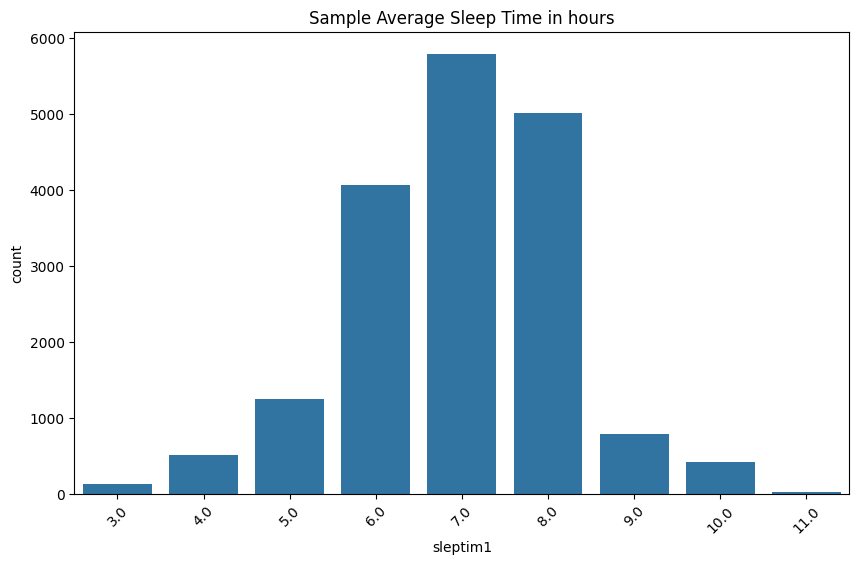

In [6]:
# Plot distribution of categories
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='sleptim1')
plt.title(f"Sample Average Sleep Time in hours")
plt.xticks(rotation=45)
plt.show()

We can observe from the bar chart that we seem to follow a pretty normal distribution of values. There is a very slight left skew in our data. However, there doesn't seem to be many biases throughout the entire sample. And the sample has a mean sleep time of 6.96 hours! That's great

#### Analysis and distributions of the other factors <a id='section3'></a> <a id='eda-section2'></a>
* Sex
* Income level 
* Education
* Employment
* Mental Health

In [7]:
data_prev = data[['sex', 'income2', 'educa', 'employ1', 'menthlth']]
data_prev.head()

,sex,income2,educa,employ1,menthlth
0,Female,"Less than $50,000",College 4 years or more (College graduate),Employed for wages,0.0
1,Female,"Less than $15,000",College 4 years or more (College graduate),Retired,4.0
2,Female,"$75,000 or more",College 1 year to 3 years (Some college or tec...,Retired,0.0
3,Female,"$75,000 or more",Grade 12 or GED (High school graduate),Out of work for 1 year or more,0.0
4,Female,unknown,College 4 years or more (College graduate),Retired,5.0


In [8]:
def analyze_proportions_and_sleep(df, columns, sleep_column='sleptim1', plot=True):
    """
    This function calculates the proportion of each category within specified columns
    and explores their relationship with the sleep duration variable. Optionally,
    it can also plot these proportions and checks variable types to ensure that
    descriptive statistics are only calculated for numeric data.

    Parameters:
        df (pd.DataFrame): The dataset containing the columns.
        columns (list): List of column names to analyze.
        sleep_column (str): The name of the column containing sleep duration data.
        plot (bool): Whether to plot the proportions for each category.

    Returns:
        dict: A dictionary containing dataframes for each column with the proportions of each category
              and, if numeric, basic statistics on sleep duration for those categories.
    """
    results = {}
    
    for column in columns:
        # Calculate the proportion of each category
        category_counts = df[column].value_counts(normalize=True).reset_index()
        category_counts.columns = [column, 'proportion']
        category_counts['proportion'] = category_counts['proportion'] * 100  # Convert to percentage
        
        # Store proportions in the results dictionary
        results[column] = {'Proportions': category_counts}

        # Check if the column is numeric before calculating descriptive statistics
        if pd.api.types.is_numeric_dtype(df[column]):
            sleep_stats = df.groupby(column)[sleep_column].describe()
            results[column]['Sleep Stats'] = sleep_stats
        
        if plot:
            plt.figure(figsize=(10, 5))
            plt.bar(category_counts[column].astype(str), category_counts['proportion'], color='skyblue')
            plt.xlabel(column)
            plt.tick_params(axis='x', which='both', labelrotation=45)
            plt.ylabel('Percentage')
            plt.grid(True, linestyle='--', alpha=0.6)
            plt.title(f'Proportion of {column}')
            plt.show()
    
    return results

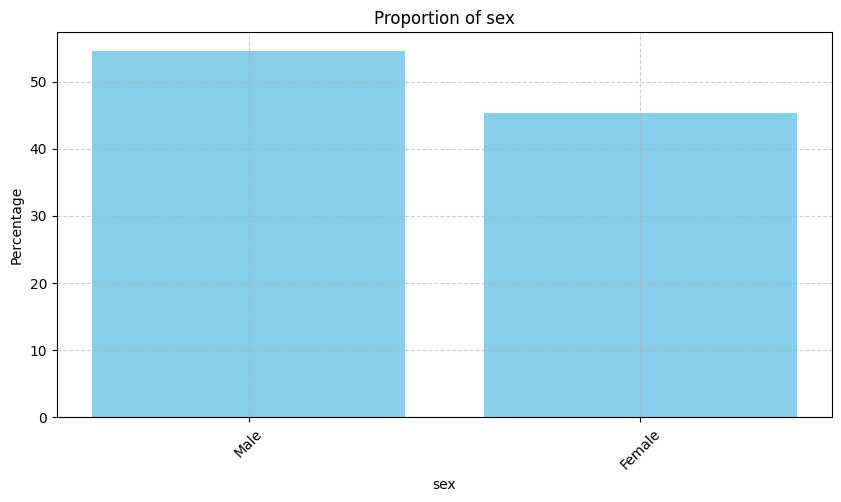

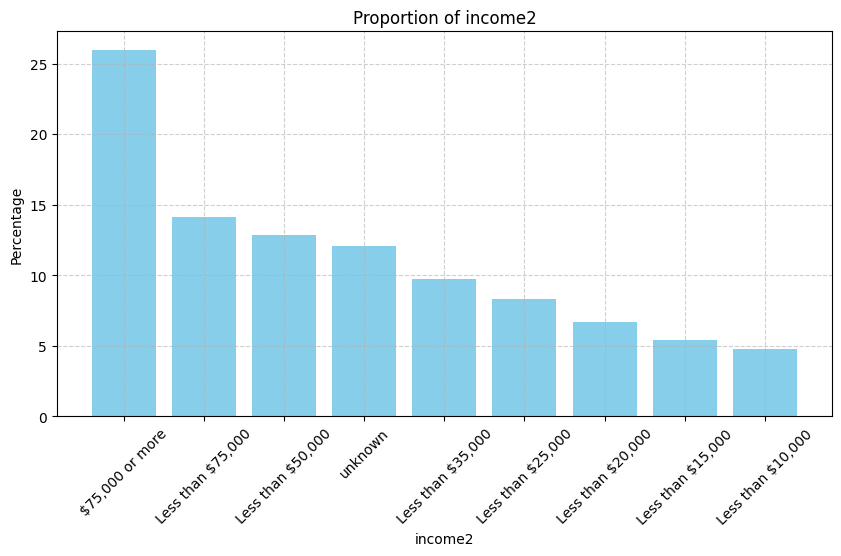

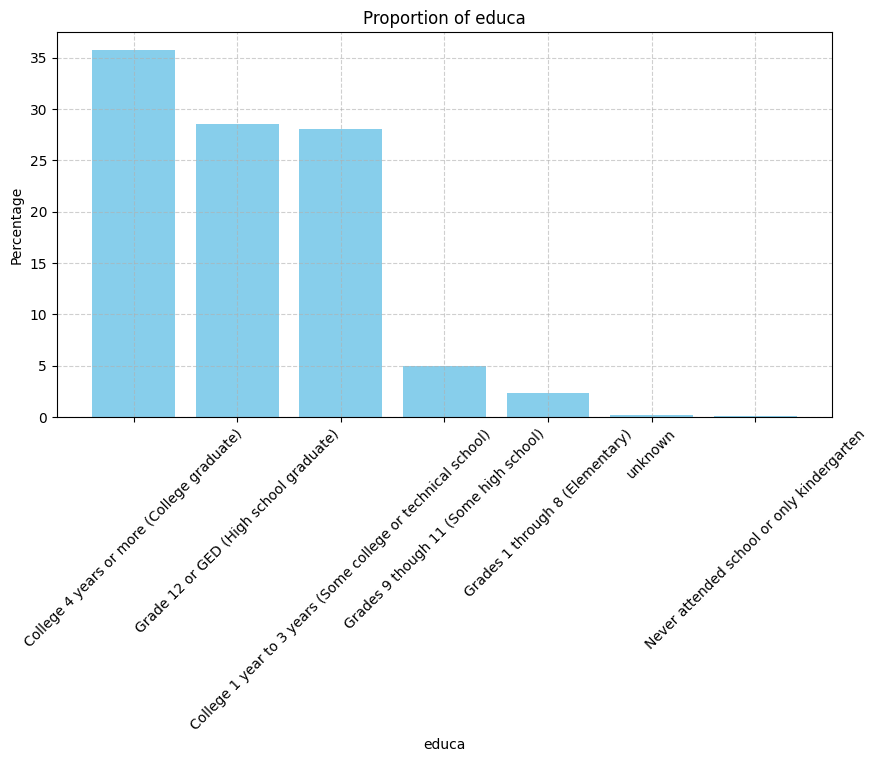

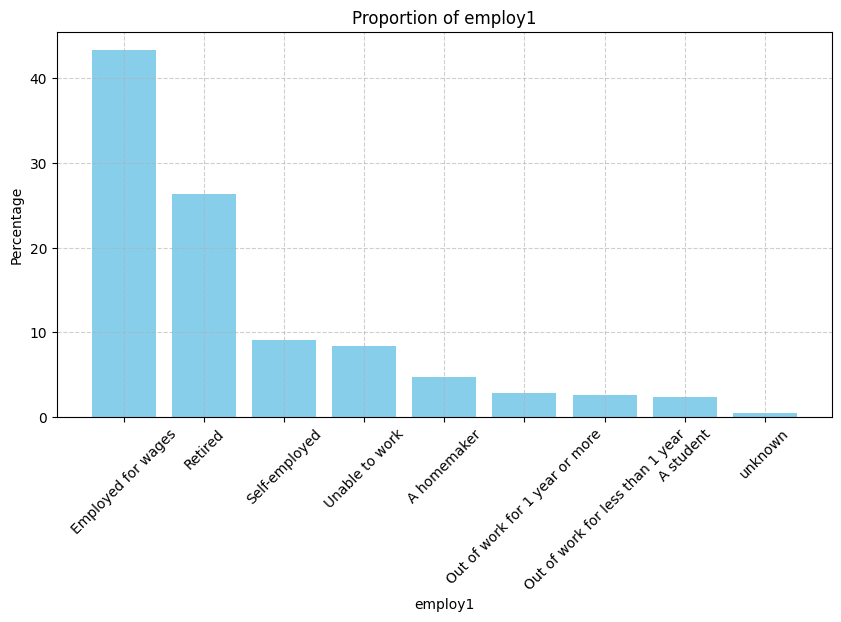

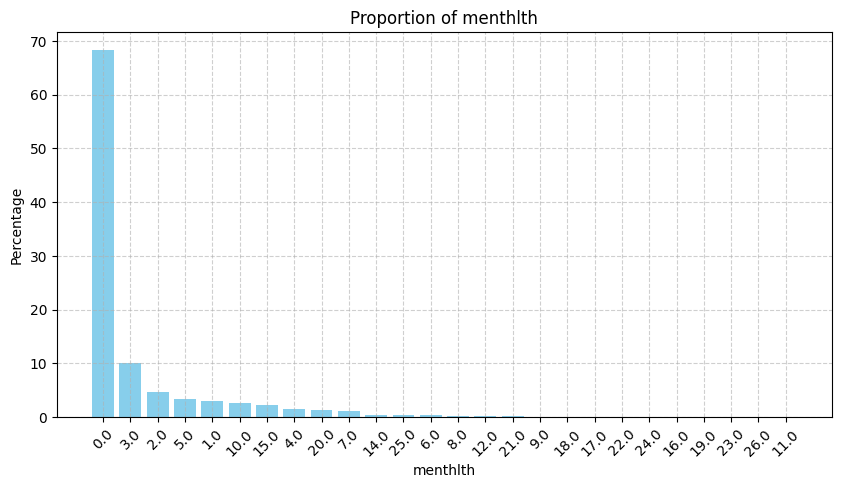

In [9]:
columns_of_interest = ['sex', 'income2', 'educa', 'employ1', 'menthlth']
results = analyze_proportions_and_sleep(data, columns_of_interest)

In [10]:
for column in columns_of_interest:
    print(f"---\nAnalysis for {column}:\n---")
    # Format the 'proportion' column to show percentage symbols
    formatted_proportions = results[column]['Proportions'].style.format({
        'proportion': '{:.2f}%'.format 
    })
    
    display(formatted_proportions)

---
Analysis for sex:
---


,sex,proportion
0,Male,54.62%
1,Female,45.38%


---
Analysis for income2:
---


,income2,proportion
0,"$75,000 or more",25.97%
1,"Less than $75,000",14.12%
2,"Less than $50,000",12.87%
3,unknown,12.07%
4,"Less than $35,000",9.77%
5,"Less than $25,000",8.30%
6,"Less than $20,000",6.72%
7,"Less than $15,000",5.43%
8,"Less than $10,000",4.75%


---
Analysis for educa:
---


,educa,proportion
0,College 4 years or more (College graduate),35.70%
1,Grade 12 or GED (High school graduate),28.52%
2,College 1 year to 3 years (Some college or technical school),28.09%
3,Grades 9 though 11 (Some high school),5.00%
4,Grades 1 through 8 (Elementary),2.36%
5,unknown,0.21%
6,Never attended school or only kindergarten,0.12%


---
Analysis for employ1:
---


,employ1,proportion
0,Employed for wages,43.33%
1,Retired,26.36%
2,Self-employed,9.04%
3,Unable to work,8.36%
4,A homemaker,4.77%
5,Out of work for 1 year or more,2.85%
6,Out of work for less than 1 year,2.54%
7,A student,2.31%
8,unknown,0.44%


---
Analysis for menthlth:
---


,menthlth,proportion
0,0.000000,68.23%
1,3.000000,9.96%
2,2.000000,4.69%
3,5.000000,3.36%
4,1.000000,3.01%
5,10.000000,2.58%
6,15.000000,2.20%
7,4.000000,1.46%
8,20.000000,1.26%
9,7.000000,1.13%


#### Descriptive Statistics for Sleep across groups
<a id='eda-section2'></a>

* Comparative boxplot of distribution between men and women
* Comparative boxplot of income levels, also classified between men and women
* Coloured scatterplot of employment type vs. sleep time in hours with mentalhealth effect

In [11]:
fig = px.box(data, x = 'sex', y='sleptim1')
fig.show()

In [19]:
fig = make_subplots(rows=1, cols = 2)
# * For multiple boxplots we have to filter out the data first: 
female_data = data[data['sex'] == 'Female']
male_data = data[data['sex'] == 'Male']

fig.add_trace(
    go.Box(x = female_data['income2'], y=female_data['sleptim1'], 
             name='Female'), 
             row = 1, col = 1
)
fig.add_trace(
    go.Box(x = male_data['income2'], y=male_data['sleptim1'], 
             name='Male'), 
             row = 1, col = 2
)
fig.update_layout(height=600,width=800, title_text='Income boxplot for sleep duration')
fig.show()

In [29]:

# Creating a frequency column based on the combination of 'sleptim1' and 'income2'
data['frequency'] = data.groupby(['sleptim1', 'income2'])['income2'].transform('count')

category_order = {
    'income2': [
        '$75,000 or more', 'Less than $75,000', 'Less than $50,000', 
        'Less than $35,000', 'Less than $25,000', 'Less than $20,000', 
        'Less than $15,000', 'Less than $10,000', 'unknown'
    ]
}

fig = px.scatter(data, x = 'sleptim1', y='income2', size='frequency', color='menthlth', category_orders=category_order,
                 labels={'sleptim1': 'Sleep Time', 'income2': 'Income Level', 'mntlhlth': 'Mental Health Status', 'frequency': 'Frequency'})
fig.show()

Correlation Matrix between mental health and sleep time

In [39]:
# Filter the necessary columns
data_filtered = data[['menthlth', 'sleptim1']]

# Calculate the correlation matrix
correlation_matrix = data_filtered.corr()

# Visualize the correlation matrix using imshow
fig = px.imshow(correlation_matrix, text_auto=True, 
                labels=dict(x="Variable", y="Variable", color="Correlation"),
                x=['menthlth', 'sleptim1'],
                y=['menthlth', 'sleptim1'],
                title="Correlation Matrix of Mental Health and Sleep Time")

fig.show()

Cramér's V is used for categorical-categorical pairs and measures association between two variables

In [40]:
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))    
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

variables = ['sleptim1', 'menthlth', 'sex', 'income2', 'educa', 'employ1']
data = pd.DataFrame(data, columns=variables)

# Create an empty DataFrame to store correlations
corr_matrix = pd.DataFrame(index=variables, columns=variables, dtype=float)

# Calculate correlations
for col1 in variables:
    for col2 in variables:
        if col1 == col2:
            corr_matrix.loc[col1, col2] = 1.0
        else:
            if data[col1].dtype == 'O' or data[col2].dtype == 'O':  # Object types for categorical data
                corr = cramers_v(data[col1], data[col2])
            else:
                corr = data[[col1, col2]].corr().iloc[0,1]  # Pearson correlation for numerical data
            corr_matrix.loc[col1, col2] = corr

print(corr_matrix)

          sleptim1  menthlth       sex   income2     educa   employ1
sleptim1  1.000000 -0.134207  0.024386  0.062458  0.052723  0.091569
menthlth -0.134207  1.000000  0.110142  0.081859  0.051126  0.114543
sex       0.024386  0.110142  1.000000  0.150685  0.049701  0.262669
income2   0.062458  0.081859  0.150685  1.000000  0.182876  0.177039
educa     0.052723  0.051126  0.049701  0.182876  1.000000  0.118046
employ1   0.091569  0.114543  0.262669  0.177039  0.118046  1.000000


In [41]:
fig = px.imshow(corr_matrix, text_auto=True,
                labels=dict(x="Variables", y="Variables", color="Correlation"),
                title="Correlation Matrix with Categorical and Numerical Variables")
fig.show()


We can see thet the variable that most correlates with sleep with sleep is mental health, the higher the number of bad mental health days, the worse sleep is.

## **ANOVA and Confidence Interval analysis** <a id='section3'></a>

#### ANOVA analysis per variable <a id='an-section1'>

In [70]:
def perform_anova(data, group_var, dependent_var):
    """
    Perform ANOVA across all categories of a specified variable.

    Parameters:
    - data: pandas DataFrame containing the data.
    - group_var: string, the name of the categorical variable for groups.
    - dependent_var: string, the name of the dependent variable.

    Returns:
    - F-statistic and p-value of the ANOVA test.
    """
    groups = data[group_var].dropna().unique()  # * Get all unique non-NA categories
    args = [data[data[group_var] == group][dependent_var] for group in groups if not data[data[group_var] == group][dependent_var].empty]
    anova_result = stats.f_oneway(*args)
    return anova_result.statistic, anova_result.pvalue

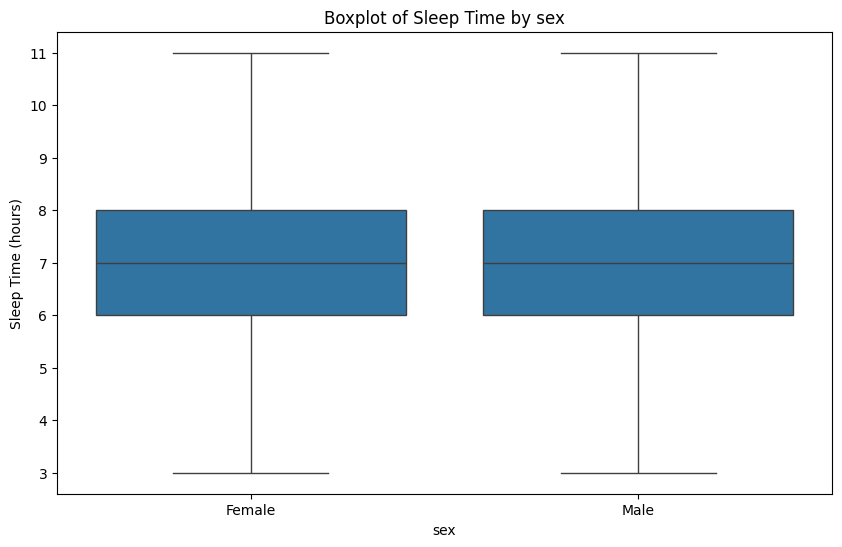

ANOVA result for sex:
F-statistic = 7.747120891101367, p-value = 0.005388047340922857


Statistical analysis shows significant differences in mean sleep time across the groups.




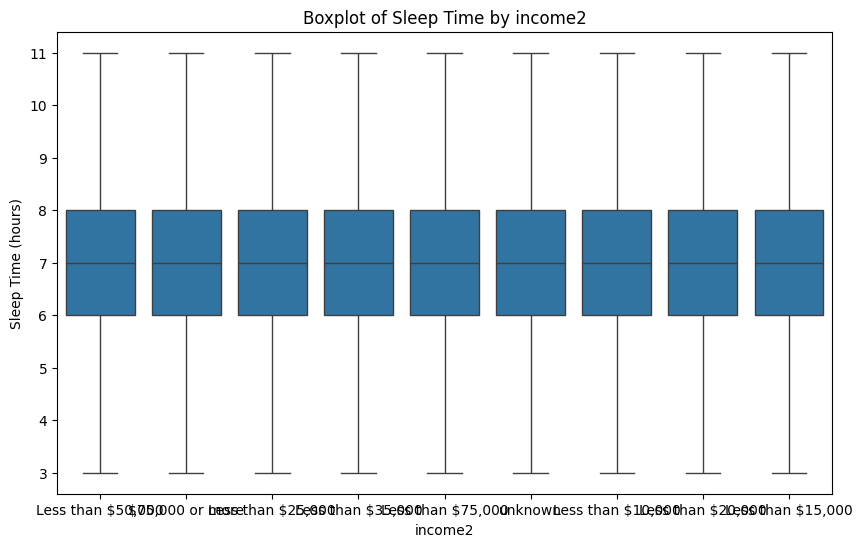

ANOVA result for income2:
F-statistic = 3.6600408832713236, p-value = 0.0002863017448237172


Statistical analysis shows significant differences in mean sleep time across the groups.




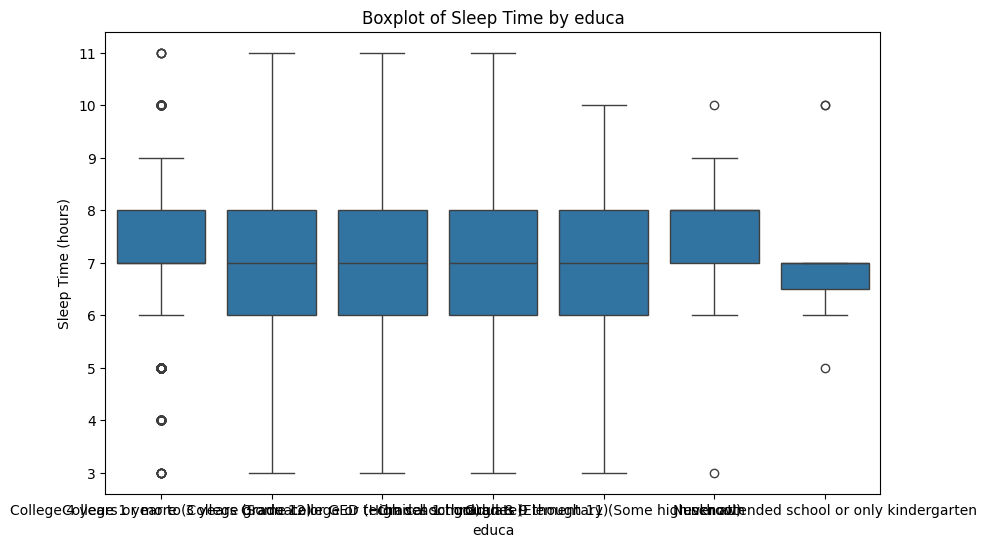

ANOVA result for educa:
F-statistic = 3.6234720486491803, p-value = 0.001357840773494328


Statistical analysis shows significant differences in mean sleep time across the groups.




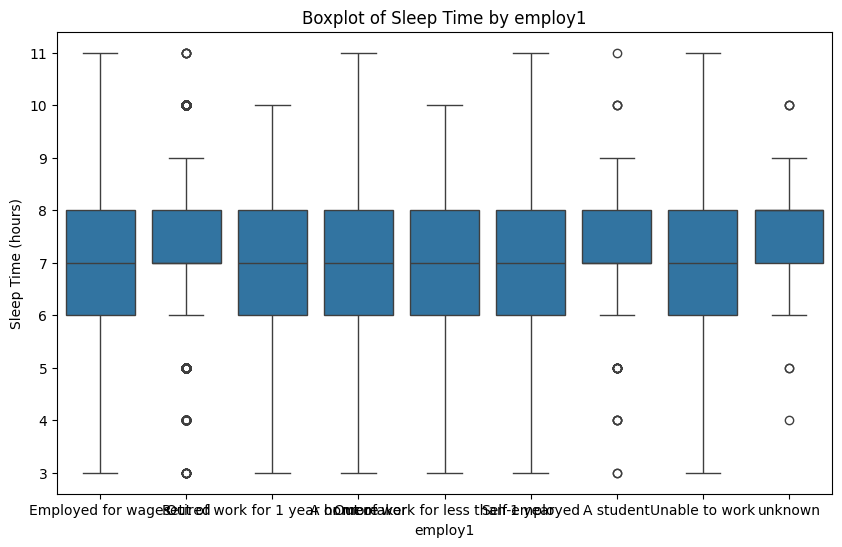

ANOVA result for employ1:
F-statistic = 43.260086127381186, p-value = 6.27635545537883e-69


Statistical analysis shows significant differences in mean sleep time across the groups.




In [80]:
variables = ['sex', 'income2', 'educa', 'employ1']

for var in variables:
    plt.figure(figsize=(10, 6))  # Set the figure size for better visibility
    sns.boxplot(x=var, y='sleptim1', data=data)
    plt.title(f'Boxplot of Sleep Time by {var}')
    plt.xlabel(var)
    plt.ylabel('Sleep Time (hours)')
    plt.show()

    # Perform ANOVA and display the results
    anova_statistic, anova_pvalue = perform_anova(data, var, 'sleptim1')
    print(f"ANOVA result for {var}:\n{'='*20}\nF-statistic = {anova_statistic}, p-value = {anova_pvalue}\n\n")

    if anova_pvalue < 0.05:
        print("Statistical analysis shows significant differences in mean sleep time across the groups.")
    else:
        print("No significant differences in mean sleep time were found across the groups.")
    print("\n")


#### Confidence Interval <a id='an-section2'></a>

In [81]:
def calculate_ci(data):
    mean_val = np.mean(data)
    std_val = np.std(data, ddof=1)
    sample_size = len(data)
    ci = stats.norm.interval(0.95, loc=mean_val, scale=std_val / np.sqrt(sample_size))
    return mean_val, ci

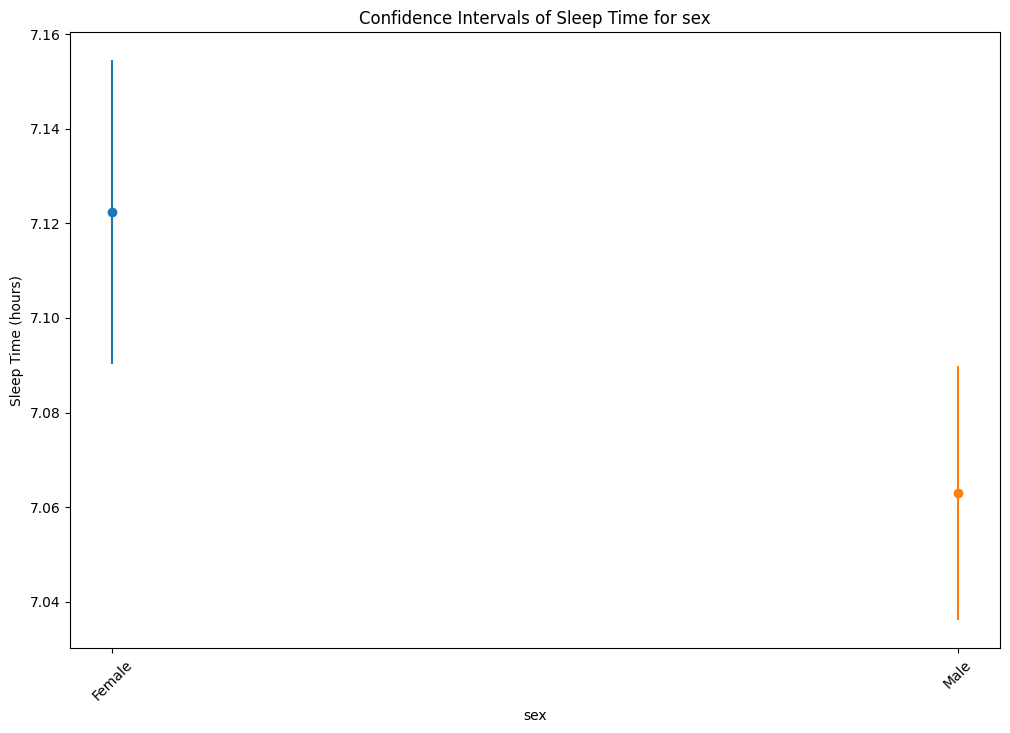

Confidence Intervals for sex:
  Category      Mean  CI Lower Bound  CI Upper Bound
0   Female  7.122389        7.090331        7.154448
1     Male  7.063006        7.036081        7.089932



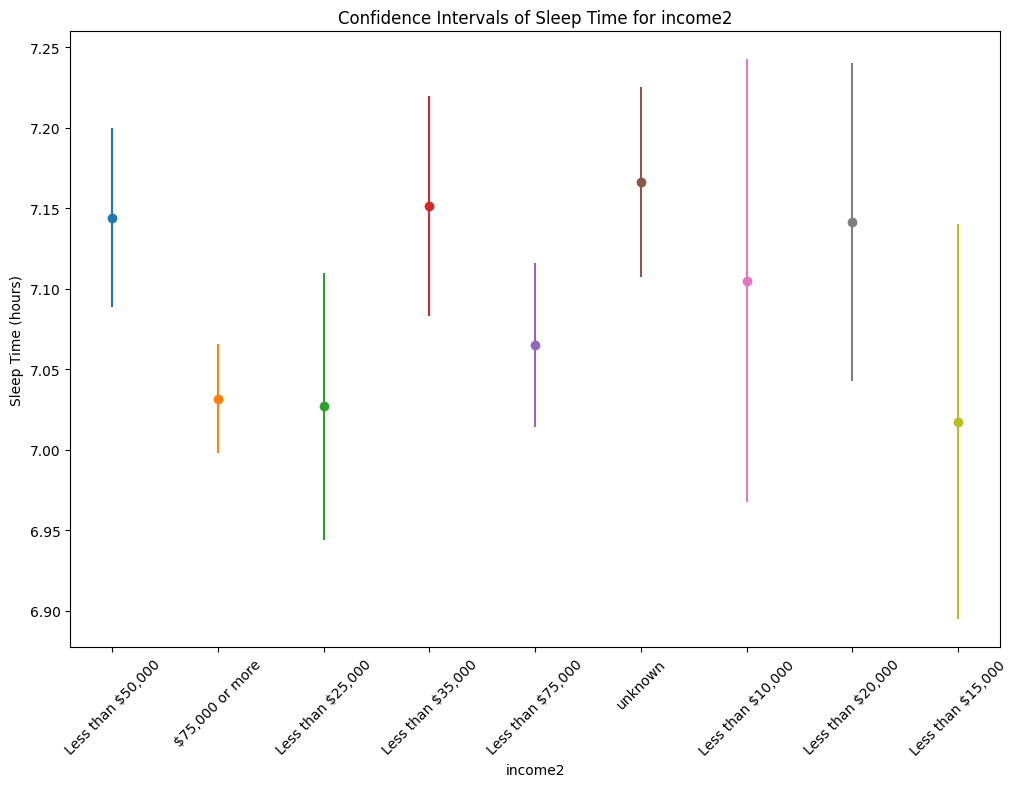

Confidence Intervals for income2:
            Category      Mean  CI Lower Bound  CI Upper Bound
0  Less than $50,000  7.144231        7.088750        7.199712
1    $75,000 or more  7.031615        6.997739        7.065491
2  Less than $25,000  7.026915        6.944124        7.109706
3  Less than $35,000  7.151515        7.083010        7.220020
4  Less than $75,000  7.065205        7.014326        7.116085
5            unknown  7.166335        7.107404        7.225267
6  Less than $10,000  7.104987        6.967560        7.242414
7  Less than $20,000  7.141274        7.042519        7.240029
8  Less than $15,000  7.017476        6.894575        7.140377



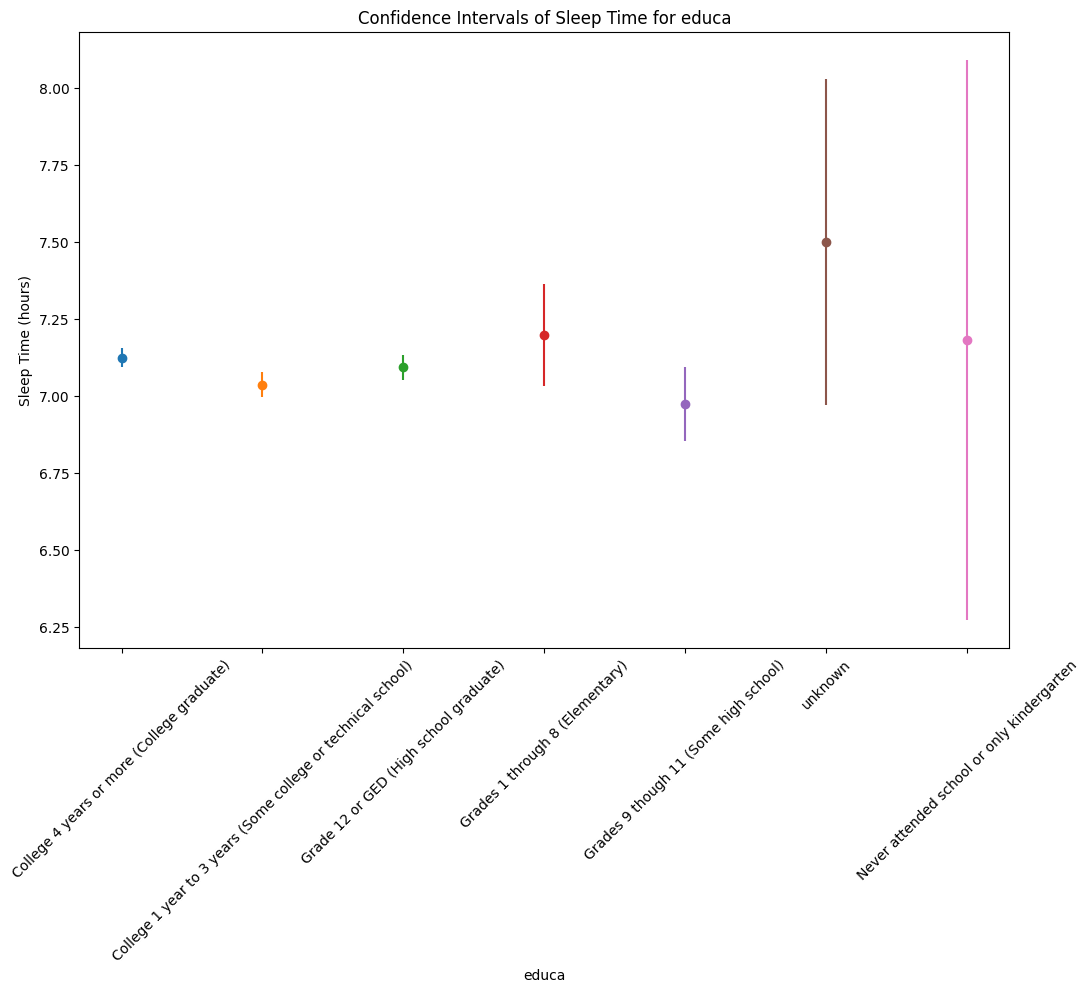

Confidence Intervals for educa:
                                            Category      Mean  \
0         College 4 years or more (College graduate)  7.125163   
1  College 1 year to 3 years (Some college or tec...  7.036585   
2             Grade 12 or GED (High school graduate)  7.093474   
3                    Grades 1 through 8 (Elementary)  7.197719   
4              Grades 9 though 11 (Some high school)  6.972973   
5                                            unknown  7.500000   
6         Never attended school or only kindergarten  7.181818   

   CI Lower Bound  CI Upper Bound  
0        7.094665        7.155661  
1        6.996415        7.076755  
2        7.052969        7.133979  
3        7.032487        7.362950  
4        6.852989        7.092957  
5        6.972395        8.027605  
6        6.273282        8.090354  



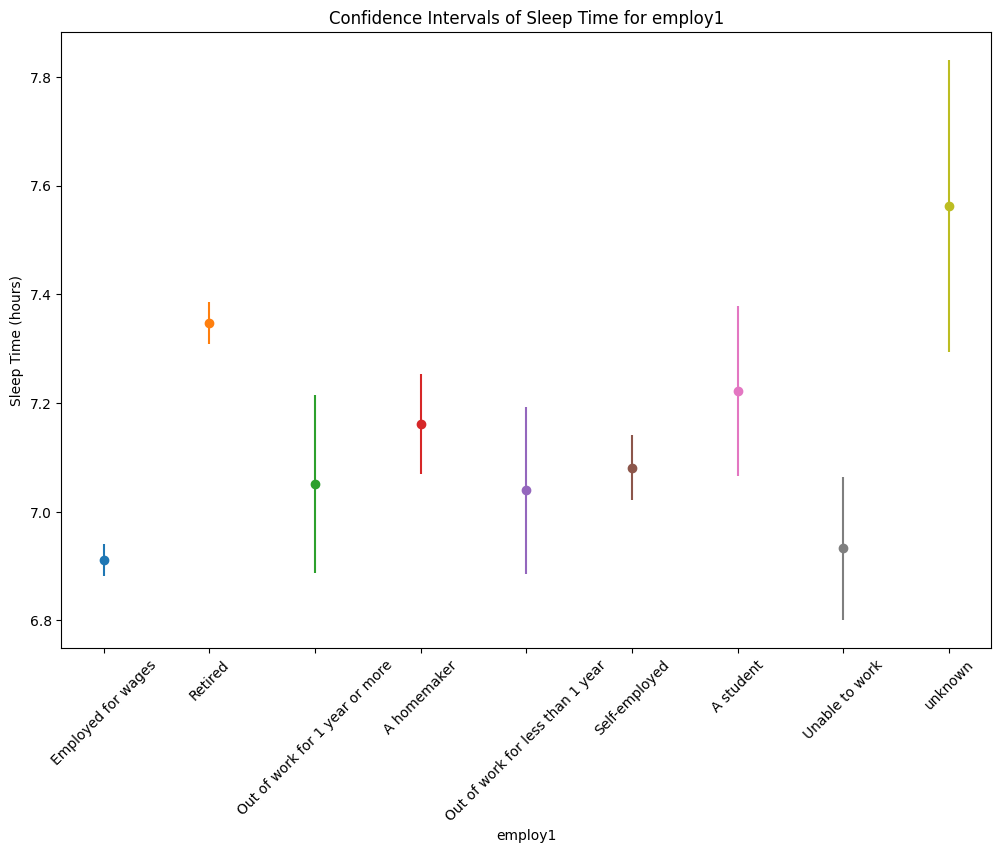

Confidence Intervals for employ1:
                           Category      Mean  CI Lower Bound  CI Upper Bound
0                Employed for wages  6.910931        6.882307        6.939555
1                           Retired  7.347616        7.309331        7.385902
2    Out of work for 1 year or more  7.051181        6.887838        7.214524
3                       A homemaker  7.161512        7.069526        7.253498
4  Out of work for less than 1 year  7.039301        6.885228        7.193374
5                     Self-employed  7.080565        7.020746        7.140384
6                         A student  7.222222        7.065537        7.378908
7                    Unable to work  6.932234        6.800784        7.063685
8                           unknown  7.562500        7.293855        7.831145



In [83]:
for var in variables:
    categories = data[var].dropna().unique()
    mean_cis = []

    for category in categories:
        category_data = data[data[var] == category]['sleptim1'].dropna()
        if not category_data.empty:
            mean_val, ci = calculate_ci(category_data)
            mean_cis.append((category, mean_val, ci[0], ci[1]))

    # Plotting the confidence intervals
    plt.figure(figsize=(12, 8))
    for i, (category, mean, ci_lower, ci_upper) in enumerate(mean_cis):
        plt.errorbar(x=i, y=mean, yerr=[[mean - ci_lower], [ci_upper - mean]], fmt='o', label=f'{category} (CI)')
    plt.xticks(ticks=range(len(mean_cis)), labels=[x[0] for x in mean_cis], rotation=45)
    plt.title(f'Confidence Intervals of Sleep Time for {var}')
    plt.xlabel(var)
    plt.ylabel('Sleep Time (hours)')
    plt.show()

    # Creating DataFrame from results to display as a table
    results_df = pd.DataFrame(mean_cis, columns=['Category', 'Mean', 'CI Lower Bound', 'CI Upper Bound'])
    print(f"Confidence Intervals for {var}:\n{results_df}\n")